In [2]:
#!pip install kss
#!pip install kerastuner

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

%matplotlib inline

import os
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import string
import re

from konlpy.tag import Okt
# from konlpy.tag import Mecab 

#pip install kss
from kss import split_sentences   
#from pykospacing import spacing

from gensim.models import Word2Vec

# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# from tensorflow.keras.layers import Embedding, Dense,GRU,Flatten, LSTM,Conv1D, GlobalMaxPooling1D, Embedding, Dropout, GlobalAveragePooling1D

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.optimizers import Adam

# from kerastuner.tuners import RandomSearch # 랜덤서치를 합니다

from gensim .models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc
from tqdm import tqdm

### Ward clustering 군집 덴드로그램 

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score

In [5]:
# 실루엣 계수 뽑는 함수
data = pd.read_pickle('data_벡터화(토큰).pkl')
num_cluster = 9
def visualize_silhouette_layer1(data, num_cluster):
    clusters_range = range(2,int(num_cluster))
    results = []

    for i in clusters_range:
        clusterer = AgglomerativeClustering(n_clusters=i,linkage='ward')
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_ac = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    return result, pivot_ac

In [6]:
df = data[["token", "review_vec"]]
df = df.dropna()
df

,token,review_vec
0,"[커리어, 경력, 사람, 추천, 수평, 사무실, 분위기, 복지, 곳, 편, 회사, ...","[-0.3265629, -0.20540974, 0.1888582, 0.1315793..."
1,"[자유롭다, 복장, 분위기, 편하다, 좋다, 업무, 당연하다, 강도, 부분, 편하다...","[-0.4096759, 0.10019315, -0.03808209, -0.01951..."
2,"[워, 밸, 성장, 동시, 수, 안되다, 기업, 앞, 가장, 전망, 좋다, 플랫폼,...","[-0.36782032, -0.23058303, 0.074808866, -0.011..."
3,"[개발자, 영향력, 발휘, 곳, 업계, 위, 개발, 집중, 수, 보상, 복지, 좋다...","[-0.33013007, -0.117650464, 0.10383661, -0.015..."
4,"[아르바이트, 생, 꿈, 직장, 이란, 이렇다, 수, 휴가, 연차, 복지, 눈치, ...","[-0.22602941, -0.14391607, 0.14934903, 0.08710..."
...,...,...
60568,"[돈, 성장, 원하다, 높다, 보상, 원하다, 도전, 직원, 평균연령, 젊음, 사고...","[-0.43693778, -0.34135696, 0.12423124, -0.0626..."
60569,"[자율, 분위기, 조직, 문화, 안정, 회사, 원하다, 지원, 경영, 진의, 마인드...","[-0.42883778, -0.39161068, 0.2860069, 0.329696..."
60570,"[대한, 열정, 대인관계, 높다, 연봉, 직급, 수, 젊다, 분위기, 분위기, 좋다...","[-0.29673645, -0.22056107, 0.20917991, 0.06296..."
60571,"[젊다, 분위기, 야근, 많다, 주말, 근무, 많다, 월급, 작다, 규모, 가지, ...","[-0.33322313, -0.300865, 0.05103625, -0.124771..."


In [7]:
df["review vector"] = np.array(df["review_vec"],dtype=object)
print(df["review vector"])

0        [-0.3265629, -0.20540974, 0.1888582, 0.1315793...
1        [-0.4096759, 0.10019315, -0.03808209, -0.01951...
2        [-0.36782032, -0.23058303, 0.074808866, -0.011...
3        [-0.33013007, -0.117650464, 0.10383661, -0.015...
4        [-0.22602941, -0.14391607, 0.14934903, 0.08710...
                               ...                        
60568    [-0.43693778, -0.34135696, 0.12423124, -0.0626...
60569    [-0.42883778, -0.39161068, 0.2860069, 0.329696...
60570    [-0.29673645, -0.22056107, 0.20917991, 0.06296...
60571    [-0.33322313, -0.300865, 0.05103625, -0.124771...
60572    [-0.21479578, -0.10290742, 0.04783873, 0.14692...
Name: review vector, Length: 60573, dtype: object


In [8]:
rv = []
ul = []
for a, i in enumerate(df["review_vec"]):
    if type(i) != int:
        rv.append(i)
    else:
        ul.append(a)
print(len(rv))
print(len(ul))
ul

60573
0


[]

In [9]:
for i in ul:
    df = df.drop(df.index[i])
df = df.reset_index(drop = True)
df

,token,review_vec,review vector
0,"[커리어, 경력, 사람, 추천, 수평, 사무실, 분위기, 복지, 곳, 편, 회사, ...","[-0.3265629, -0.20540974, 0.1888582, 0.1315793...","[-0.3265629, -0.20540974, 0.1888582, 0.1315793..."
1,"[자유롭다, 복장, 분위기, 편하다, 좋다, 업무, 당연하다, 강도, 부분, 편하다...","[-0.4096759, 0.10019315, -0.03808209, -0.01951...","[-0.4096759, 0.10019315, -0.03808209, -0.01951..."
2,"[워, 밸, 성장, 동시, 수, 안되다, 기업, 앞, 가장, 전망, 좋다, 플랫폼,...","[-0.36782032, -0.23058303, 0.074808866, -0.011...","[-0.36782032, -0.23058303, 0.074808866, -0.011..."
3,"[개발자, 영향력, 발휘, 곳, 업계, 위, 개발, 집중, 수, 보상, 복지, 좋다...","[-0.33013007, -0.117650464, 0.10383661, -0.015...","[-0.33013007, -0.117650464, 0.10383661, -0.015..."
4,"[아르바이트, 생, 꿈, 직장, 이란, 이렇다, 수, 휴가, 연차, 복지, 눈치, ...","[-0.22602941, -0.14391607, 0.14934903, 0.08710...","[-0.22602941, -0.14391607, 0.14934903, 0.08710..."
...,...,...,...
60568,"[돈, 성장, 원하다, 높다, 보상, 원하다, 도전, 직원, 평균연령, 젊음, 사고...","[-0.43693778, -0.34135696, 0.12423124, -0.0626...","[-0.43693778, -0.34135696, 0.12423124, -0.0626..."
60569,"[자율, 분위기, 조직, 문화, 안정, 회사, 원하다, 지원, 경영, 진의, 마인드...","[-0.42883778, -0.39161068, 0.2860069, 0.329696...","[-0.42883778, -0.39161068, 0.2860069, 0.329696..."
60570,"[대한, 열정, 대인관계, 높다, 연봉, 직급, 수, 젊다, 분위기, 분위기, 좋다...","[-0.29673645, -0.22056107, 0.20917991, 0.06296...","[-0.29673645, -0.22056107, 0.20917991, 0.06296..."
60571,"[젊다, 분위기, 야근, 많다, 주말, 근무, 많다, 월급, 작다, 규모, 가지, ...","[-0.33322313, -0.300865, 0.05103625, -0.124771...","[-0.33322313, -0.300865, 0.05103625, -0.124771..."


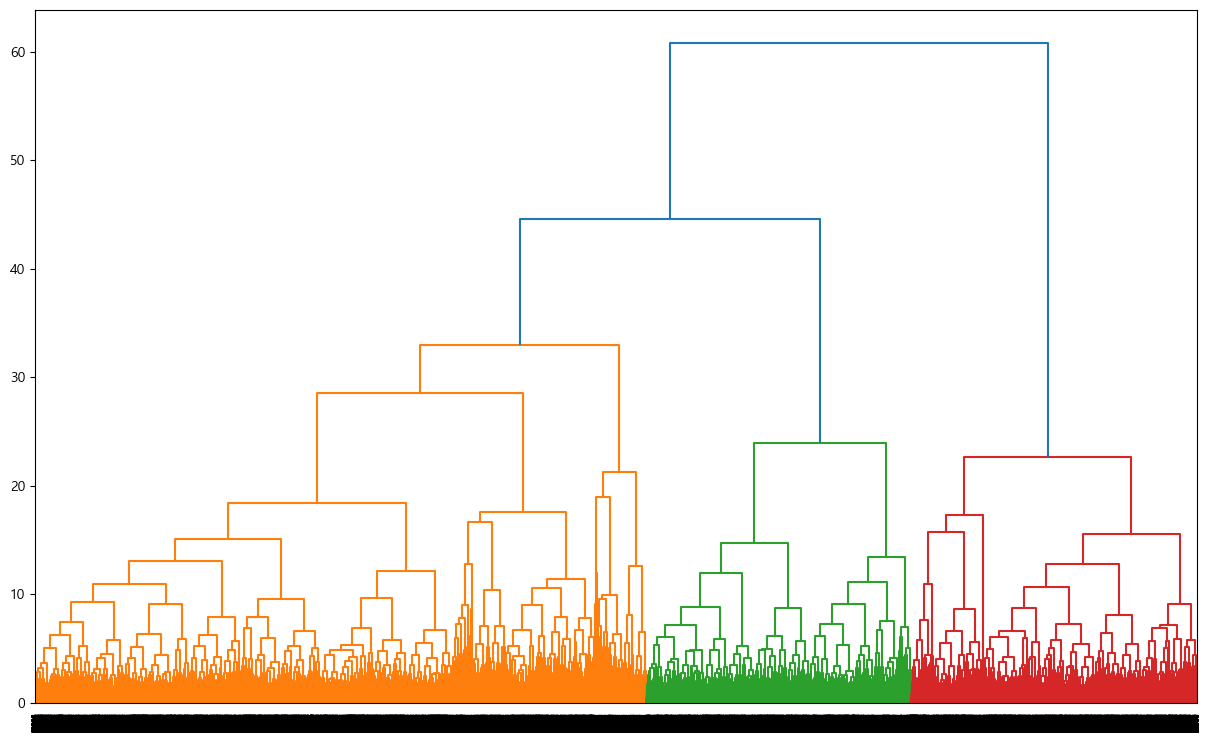

In [10]:
linked = linkage(rv, 'ward')

plt.figure(figsize=(15, 9))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.savefig('덴드로그램.png', bbox_inches='tight')            
plt.show()

### 실루엣 계수 조정

In [11]:
df

,token,review_vec,review vector
0,"[커리어, 경력, 사람, 추천, 수평, 사무실, 분위기, 복지, 곳, 편, 회사, ...","[-0.3265629, -0.20540974, 0.1888582, 0.1315793...","[-0.3265629, -0.20540974, 0.1888582, 0.1315793..."
1,"[자유롭다, 복장, 분위기, 편하다, 좋다, 업무, 당연하다, 강도, 부분, 편하다...","[-0.4096759, 0.10019315, -0.03808209, -0.01951...","[-0.4096759, 0.10019315, -0.03808209, -0.01951..."
2,"[워, 밸, 성장, 동시, 수, 안되다, 기업, 앞, 가장, 전망, 좋다, 플랫폼,...","[-0.36782032, -0.23058303, 0.074808866, -0.011...","[-0.36782032, -0.23058303, 0.074808866, -0.011..."
3,"[개발자, 영향력, 발휘, 곳, 업계, 위, 개발, 집중, 수, 보상, 복지, 좋다...","[-0.33013007, -0.117650464, 0.10383661, -0.015...","[-0.33013007, -0.117650464, 0.10383661, -0.015..."
4,"[아르바이트, 생, 꿈, 직장, 이란, 이렇다, 수, 휴가, 연차, 복지, 눈치, ...","[-0.22602941, -0.14391607, 0.14934903, 0.08710...","[-0.22602941, -0.14391607, 0.14934903, 0.08710..."
...,...,...,...
60568,"[돈, 성장, 원하다, 높다, 보상, 원하다, 도전, 직원, 평균연령, 젊음, 사고...","[-0.43693778, -0.34135696, 0.12423124, -0.0626...","[-0.43693778, -0.34135696, 0.12423124, -0.0626..."
60569,"[자율, 분위기, 조직, 문화, 안정, 회사, 원하다, 지원, 경영, 진의, 마인드...","[-0.42883778, -0.39161068, 0.2860069, 0.329696...","[-0.42883778, -0.39161068, 0.2860069, 0.329696..."
60570,"[대한, 열정, 대인관계, 높다, 연봉, 직급, 수, 젊다, 분위기, 분위기, 좋다...","[-0.29673645, -0.22056107, 0.20917991, 0.06296...","[-0.29673645, -0.22056107, 0.20917991, 0.06296..."
60571,"[젊다, 분위기, 야근, 많다, 주말, 근무, 많다, 월급, 작다, 규모, 가지, ...","[-0.33322313, -0.300865, 0.05103625, -0.124771...","[-0.33322313, -0.300865, 0.05103625, -0.124771..."


In [12]:
model = AgglomerativeClustering(n_clusters=5,linkage='ward')
label = model.fit_predict(rv)
df["cluster"] = label

In [13]:
df['cluster'].value_counts()

2    21744
1    14906
0    13796
4     7419
3     2708
Name: cluster, dtype: int64

In [14]:
df

,token,review_vec,review vector,cluster
0,"[커리어, 경력, 사람, 추천, 수평, 사무실, 분위기, 복지, 곳, 편, 회사, ...","[-0.3265629, -0.20540974, 0.1888582, 0.1315793...","[-0.3265629, -0.20540974, 0.1888582, 0.1315793...",2
1,"[자유롭다, 복장, 분위기, 편하다, 좋다, 업무, 당연하다, 강도, 부분, 편하다...","[-0.4096759, 0.10019315, -0.03808209, -0.01951...","[-0.4096759, 0.10019315, -0.03808209, -0.01951...",1
2,"[워, 밸, 성장, 동시, 수, 안되다, 기업, 앞, 가장, 전망, 좋다, 플랫폼,...","[-0.36782032, -0.23058303, 0.074808866, -0.011...","[-0.36782032, -0.23058303, 0.074808866, -0.011...",0
3,"[개발자, 영향력, 발휘, 곳, 업계, 위, 개발, 집중, 수, 보상, 복지, 좋다...","[-0.33013007, -0.117650464, 0.10383661, -0.015...","[-0.33013007, -0.117650464, 0.10383661, -0.015...",2
4,"[아르바이트, 생, 꿈, 직장, 이란, 이렇다, 수, 휴가, 연차, 복지, 눈치, ...","[-0.22602941, -0.14391607, 0.14934903, 0.08710...","[-0.22602941, -0.14391607, 0.14934903, 0.08710...",2
...,...,...,...,...
60568,"[돈, 성장, 원하다, 높다, 보상, 원하다, 도전, 직원, 평균연령, 젊음, 사고...","[-0.43693778, -0.34135696, 0.12423124, -0.0626...","[-0.43693778, -0.34135696, 0.12423124, -0.0626...",2
60569,"[자율, 분위기, 조직, 문화, 안정, 회사, 원하다, 지원, 경영, 진의, 마인드...","[-0.42883778, -0.39161068, 0.2860069, 0.329696...","[-0.42883778, -0.39161068, 0.2860069, 0.329696...",1
60570,"[대한, 열정, 대인관계, 높다, 연봉, 직급, 수, 젊다, 분위기, 분위기, 좋다...","[-0.29673645, -0.22056107, 0.20917991, 0.06296...","[-0.29673645, -0.22056107, 0.20917991, 0.06296...",2
60571,"[젊다, 분위기, 야근, 많다, 주말, 근무, 많다, 월급, 작다, 규모, 가지, ...","[-0.33322313, -0.300865, 0.05103625, -0.124771...","[-0.33322313, -0.300865, 0.05103625, -0.124771...",2


In [15]:
df.to_pickle("LDA전.pkl")
df.to_csv("LDA전.csv", encoding='utf-8-sig')

In [16]:
#for i in tqdm(range(5)):
#    model = AgglomerativeClustering(n_clusters=i,linkage='ward')
#    label = model.fit_predict(rv)
#    df["cluster {0}".format(i)] = label

  0%|          | 0/5 [00:00<?, ?it/s]


ValueError: n_clusters should be an integer greater than 0. 0 was provided.

In [ ]:
#df

,token,review_vec,review vector
0,"[커리어, 경력, 사람, 추천, 수평, 사무실, 분위기, 복지, 곳, 편, 회사, ...","[-0.3265629, -0.20540974, 0.1888582, 0.1315793...","[-0.3265629, -0.20540974, 0.1888582, 0.1315793..."
1,"[자유롭다, 복장, 분위기, 편하다, 좋다, 업무, 당연하다, 강도, 부분, 편하다...","[-0.4096759, 0.10019315, -0.03808209, -0.01951...","[-0.4096759, 0.10019315, -0.03808209, -0.01951..."
2,"[워, 밸, 성장, 동시, 수, 안되다, 기업, 앞, 가장, 전망, 좋다, 플랫폼,...","[-0.36782032, -0.23058303, 0.074808866, -0.011...","[-0.36782032, -0.23058303, 0.074808866, -0.011..."
3,"[개발자, 영향력, 발휘, 곳, 업계, 위, 개발, 집중, 수, 보상, 복지, 좋다...","[-0.33013007, -0.117650464, 0.10383661, -0.015...","[-0.33013007, -0.117650464, 0.10383661, -0.015..."
4,"[아르바이트, 생, 꿈, 직장, 이란, 이렇다, 수, 휴가, 연차, 복지, 눈치, ...","[-0.22602941, -0.14391607, 0.14934903, 0.08710...","[-0.22602941, -0.14391607, 0.14934903, 0.08710..."
...,...,...,...
60568,"[돈, 성장, 원하다, 높다, 보상, 원하다, 도전, 직원, 평균연령, 젊음, 사고...","[-0.43693778, -0.34135696, 0.12423124, -0.0626...","[-0.43693778, -0.34135696, 0.12423124, -0.0626..."
60569,"[자율, 분위기, 조직, 문화, 안정, 회사, 원하다, 지원, 경영, 진의, 마인드...","[-0.42883778, -0.39161068, 0.2860069, 0.329696...","[-0.42883778, -0.39161068, 0.2860069, 0.329696..."
60570,"[대한, 열정, 대인관계, 높다, 연봉, 직급, 수, 젊다, 분위기, 분위기, 좋다...","[-0.29673645, -0.22056107, 0.20917991, 0.06296...","[-0.29673645, -0.22056107, 0.20917991, 0.06296..."
60571,"[젊다, 분위기, 야근, 많다, 주말, 근무, 많다, 월급, 작다, 규모, 가지, ...","[-0.33322313, -0.300865, 0.05103625, -0.124771...","[-0.33322313, -0.300865, 0.05103625, -0.124771..."


In [ ]:
#df.drop(['review vector', 'cluster 6', 'cluster 7', 'cluster 8'], axis = 1, inplace = True)